## import libraries

In [1]:
### libraries for analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# other libraries
import arabic_reshaper
from bidi.algorithm import get_display
from wordcloud import WordCloud, STOPWORDS
import codecs


### read and explore data

In [2]:
## read data without live videos
df = pd.read_csv("hessas_nolive.csv")
df.head()

,created_time,message,id,from,Translate,is_human,sentment,positive,neutral,negative,post_id
0,2021-09-06T04:18:01+0000,Mohammed Adel,271594718130347_271821218107697,NaN,Mohammed Adel,T,neutral,0.00,1.00,0.00,102899871666500_271594718130347
1,2021-09-05T19:13:35+0000,مش بيجي منها حاجة ارحمونا بقى,271594718130347_271610824795403,NaN,Nothing comes of it. Have mercy on us,F,negative,0.21,0.24,0.55,102899871666500_271594718130347
2,2021-09-06T05:06:15+0000,الفيزياء,271594718130347_271840278105791,NaN,Physics,F,neutral,0.13,0.83,0.04,102899871666500_271594718130347
3,2021-09-06T00:02:03+0000,نرجو الرافة بالطلاب في الدور الثاني ومراعاتهم ...,271594718130347_271721658117653,NaN,نرجو الرافة بالطلاب في الدور الثاني ومراعاتهم ...,T,neutral,0.00,1.00,0.00,102899871666500_271594718130347
4,2021-09-05T19:06:33+0000,نهايه رحله,271594718130347_271608141462338,NaN,the end of the trip,F,neutral,0.10,0.86,0.04,102899871666500_271594718130347


### explore the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12402 entries, 0 to 12401
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   created_time  12402 non-null  object 
 1   message       12402 non-null  object 
 2   id            12402 non-null  object 
 3   from          36 non-null     object 
 4   Translate     12400 non-null  object 
 5   is_human      12402 non-null  object 
 6   sentment      12402 non-null  object 
 7   positive      12402 non-null  float64
 8   neutral       12402 non-null  float64
 9   negative      12402 non-null  float64
 10  post_id       12402 non-null  object 
dtypes: float64(3), object(8)
memory usage: 1.0+ MB


In [4]:
df.describe()

,positive,neutral,negative
count,12402.000000,12402.000000,12402.000000
mean,0.118564,0.752558,0.128878
std,0.256320,0.360408,0.277338
min,0.000000,0.000000,0.000000
25%,0.000000,0.640000,0.000000
50%,0.000000,0.960000,0.010000
75%,0.080000,1.000000,0.060000
max,1.000000,1.000000,1.000000


### fix the data 

In [5]:
# drop embity columne
df.drop("from", axis = 1, inplace = True)

In [6]:
## fix time dtypes
df.created_time =  df["created_time"].str.slice(0, 10)
df["date"] = df["created_time"].str.slice(0, 7)
df.created_time

0        2021-09-06
1        2021-09-05
2        2021-09-06
3        2021-09-06
4        2021-09-05
            ...    
12397    2020-12-11
12398    2020-12-15
12399    2020-12-06
12400    2021-01-10
12401    2021-08-01
Name: created_time, Length: 12402, dtype: object

### filter data with human mentions and over rating

In [7]:
## drop human data
hdf = df.query('is_human != "T"')

## chose data without over rating
nudf = hdf.query('neutral < 0.7')

no need for this plot bit it's here

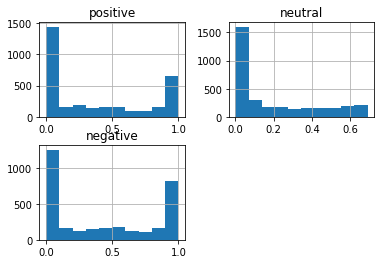

In [8]:
_ = nudf.hist()

### draw the total interactionscolors = sns.color_palette()

In [9]:
colors = sns.color_palette()

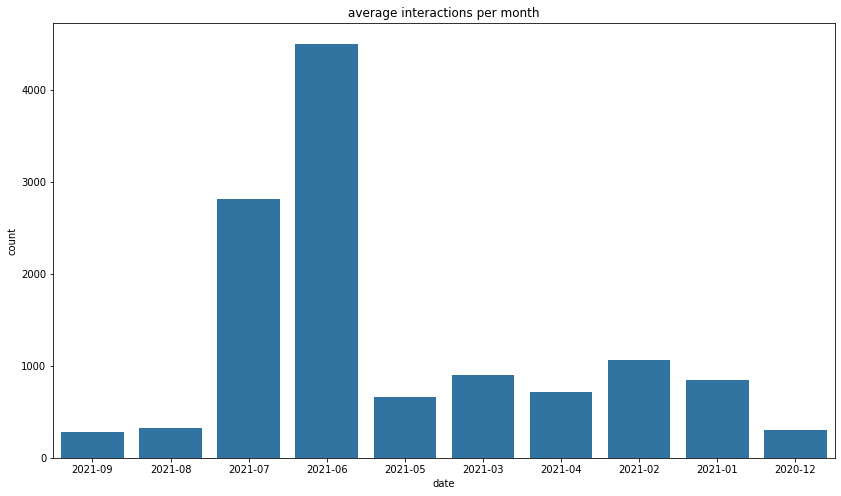

In [10]:
plot = plt.subplots(figsize = (14,8))
plot = sns.countplot(data = df,x = "date", color = colors[0])
_ = plt.ylabel("interactions count")
_ = plt.ylabel("count")
_ = plt.title(" average interactions per month ")

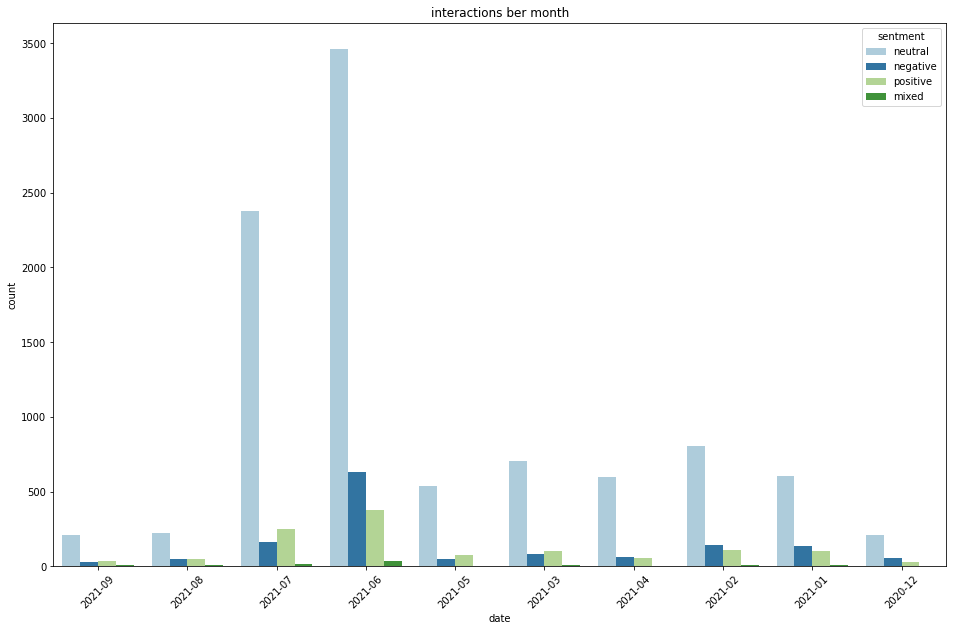

In [11]:
plot = plt.subplots(figsize = (16,10))
plot = sns.countplot(data = df, x ="date",hue = "sentment", palette = 'Paired')
_ = plt.xticks(rotation=45)
plt.title('interactions ber month')
plt.rcParams.update({'font.size':24})
_ = plt.ylabel("count")

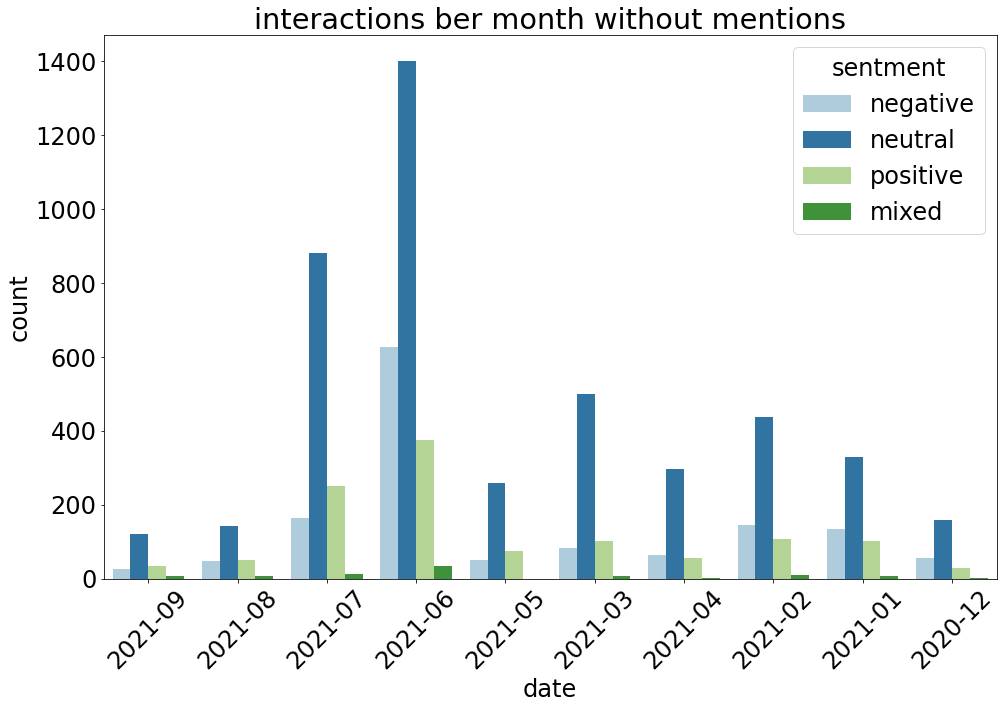

In [12]:
plot = plt.subplots(figsize = (16,10))
plot = sns.countplot(data = hdf, x ="date",hue = "sentment", palette = 'Paired')
_ = plt.xticks(rotation=45)
plt.title('interactions ber month without mentions')
plt.rcParams.update({'font.size':24})
_ = plt.ylabel("count")

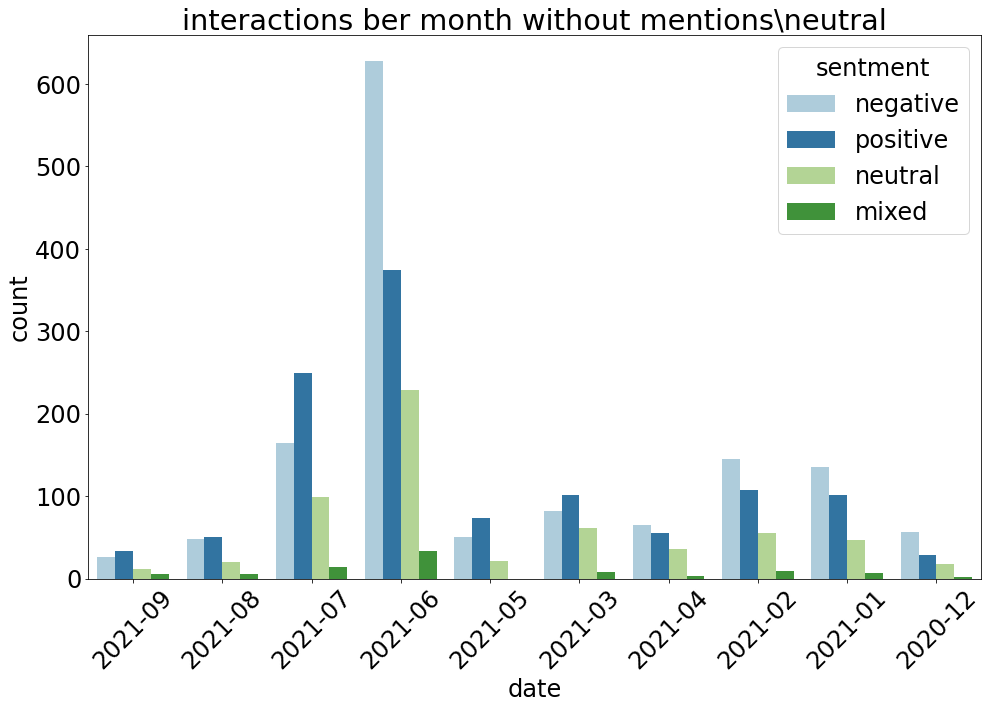

In [13]:
plot = plt.subplots(figsize = (16,10))
plot = sns.countplot(data = nudf, x ="date",hue = "sentment", palette = 'Paired')
_ = plt.xticks(rotation=45)
plt.title('interactions ber month without mentions\\neutral')
plt.rcParams.update({'font.size':24})
_ = plt.ylabel("count")

In [14]:
me = hdf[["neutral", "positive", "negative"]].groupby(hdf["date"]).mean()
me

,neutral,positive,negative
date,,,
2020-12,0.602561,0.148415,0.249024
2021-01,0.529982,0.212995,0.257023
2021-02,0.590557,0.180686,0.228757
2021-03,0.640448,0.203107,0.156445
2021-04,0.637446,0.172124,0.190430
2021-05,0.612917,0.230130,0.156953
2021-06,0.523455,0.192663,0.283882
2021-07,0.607145,0.238481,0.154374
2021-08,0.533508,0.241371,0.225121


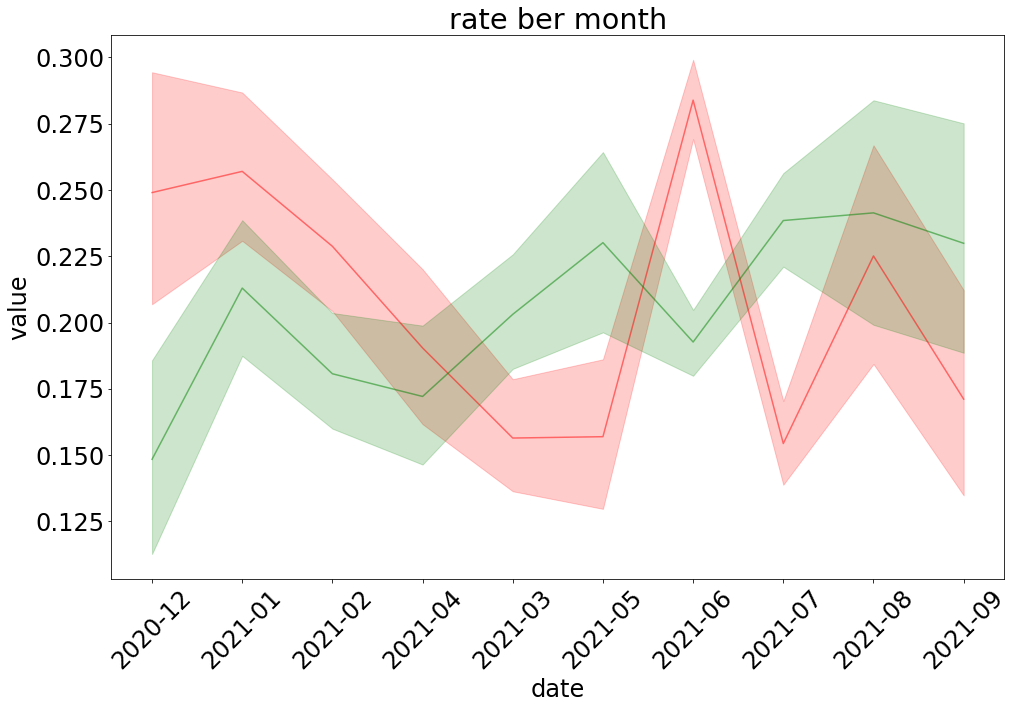

In [15]:
fig, plot = plt.subplots(figsize = (16,10))
plot = sns.lineplot(data=hdf, x="date", y="negative", color = "r", alpha = 0.5)
plot = sns.lineplot(data=hdf, x="date", y="positive", color = "g", alpha = 0.5)
plt.gca().invert_xaxis()
_ = plt.xticks(rotation=45)
plt.title('rate ber month')
_ = plt.ylabel("value")

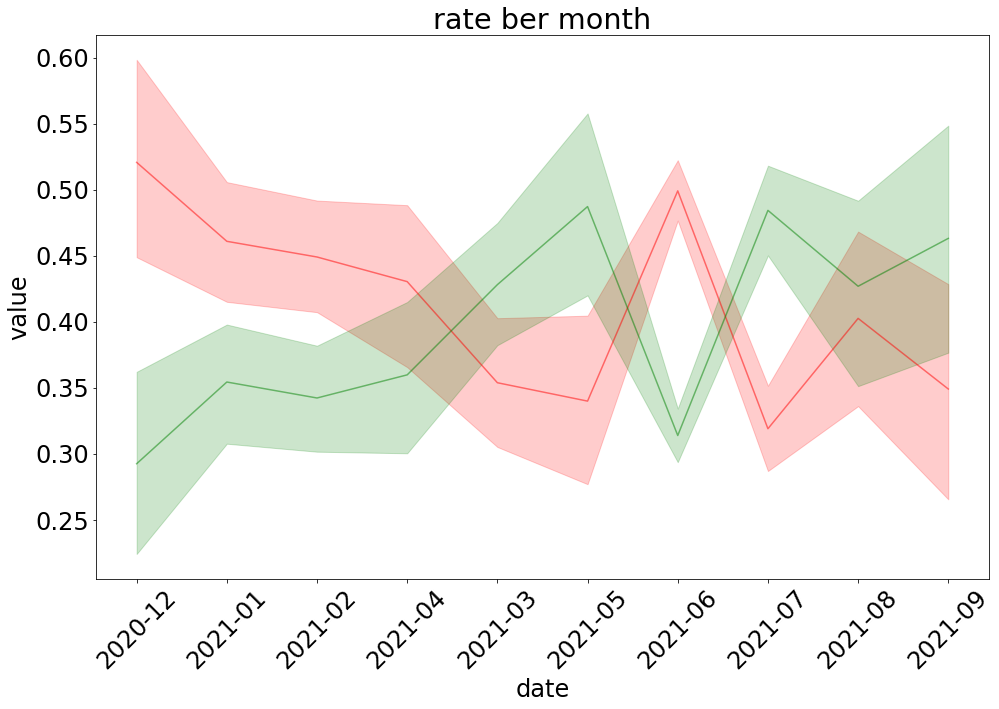

In [16]:
fig, plot = plt.subplots(figsize = (16,10))
plot = sns.lineplot(data=nudf, x="date", y="negative", color = "r", alpha = 0.5)
plot = sns.lineplot(data=nudf, x="date", y="positive", color = "g", alpha = 0.5)
plt.gca().invert_xaxis()
plt.title('rate ber month')
_ = plt.xticks(rotation=45)
_ = plt.ylabel("value")

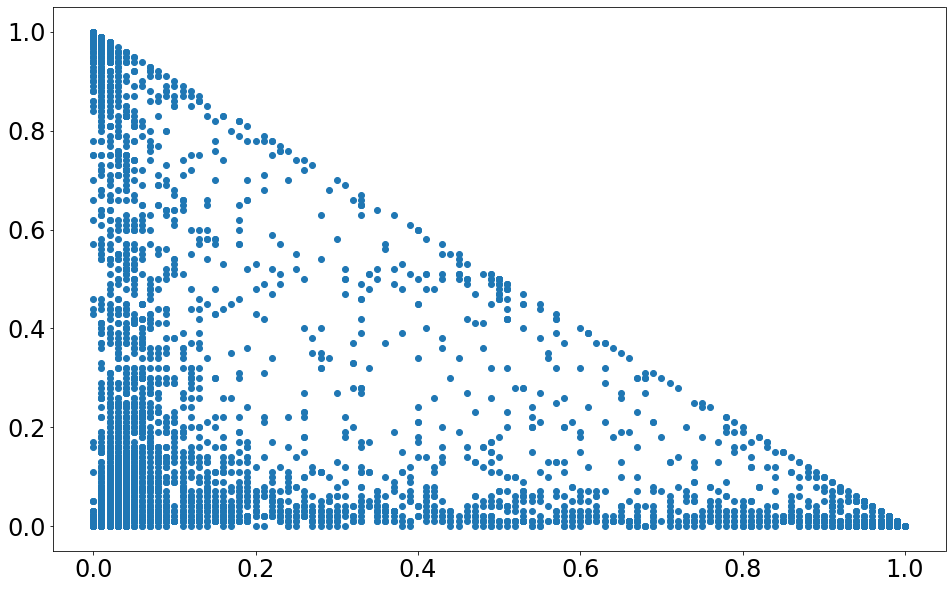

In [17]:
fig, plot = plt.subplots(figsize = (16,10))
plt.scatter(x = hdf["negative"], y =hdf["positive"] )

In [18]:
colors = sns.color_palette()

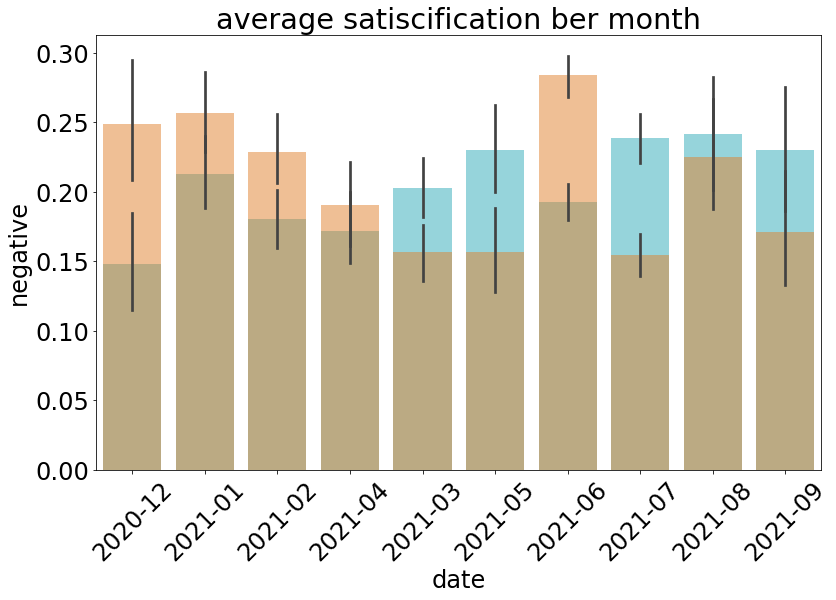

In [19]:
plot = plt.subplots(figsize = (13,8))
plot = sns.barplot(data = hdf, x ="date",  y="positive", color = colors[-1], alpha = 0.5)
plot = sns.barplot(data = hdf, x ="date",  y="negative", color = colors[1], alpha = 0.5)
plt.title('average satiscification ber month')
plt.gca().invert_xaxis()
_ = plt.xticks(rotation=45)

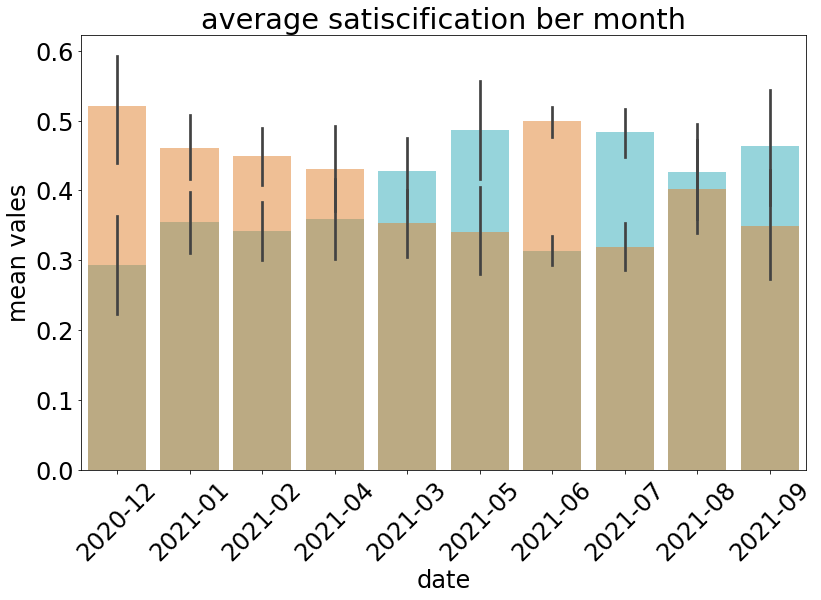

In [20]:
plot = plt.subplots(figsize = (13,8))
plot = sns.barplot(data = nudf, x ="date",  y="positive", color = colors[-1], alpha = 0.5)
plot = sns.barplot(data = nudf, x ="date",  y="negative", color = colors[1], alpha = 0.5)
plt.gca().invert_xaxis()
plt.title('average satiscification ber month')
_ = plt.ylabel("mean vales")
_ = plt.xticks(rotation=45)

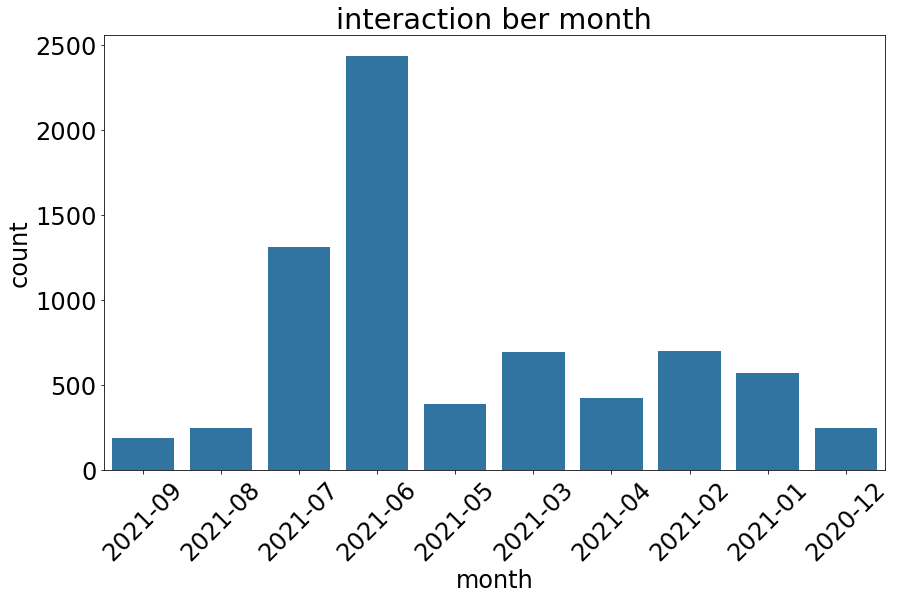

In [21]:
plot = plt.subplots(figsize = (14,8))
plot = sns.countplot(data = hdf,x = "date", color = colors[0])
_ = plt.xticks(rotation=45)
plt.title('interaction ber month')
_ = plt.ylabel("count")
_ = plt.xlabel("month")

In [22]:
df.query('sentment == "negative"').sample(10)

,created_time,message,id,Translate,is_human,sentment,positive,neutral,negative,post_id,date
5833,2021-06-15,لو سمحت حضرتك احنا حاولنا نسجل بيدينا رفض,215541427069010_218880430068443,please we tried to register with our hands a r...,F,negative,0.00,0.00,1.00,102899871666500_215541427069010,2021-06
10685,2021-02-17,الدكتور احمد بيساعدنا في الدراسه وكمان نوصل لك...,144616547494832_146833997273087,Dr. Ahmed helps us study and also arrives at t...,F,negative,0.01,0.14,0.85,102899871666500_144616547494832,2021-02
10532,2021-02-13,من فضلكم مواد ثالثه ثانوى مش كامله فين باقى ال...,144616547494832_145025417453945,"Please, third subjects of incomplete secondary...",F,negative,0.00,0.00,1.00,102899871666500_144616547494832,2021-02
7269,2021-06-03,الاسئله متكررة يعني مثلا لما احل السؤال الاول ...,210979144191905_211536030802883,"The questions are repeated, I mean, for exampl...",F,negative,0.02,0.00,0.98,102899871666500_210979144191905,2021-06
4020,2021-06-19,قناه مدرستنا 2 مش بتنزل الحصص المذاعه على اليو...,221367259819760_221439899812496,Our School Channel 2 does not post the broadca...,F,negative,0.05,0.01,0.94,102899871666500_221367259819760,2021-06
3772,2021-06-27,هو الازهر فين من داا كله؟\nمش بتشوف اى حاجه م ...,225593362730483_226074082682411,Where is Al-Azhar from all this?,F,negative,0.01,0.12,0.87,102899871666500_225593362730483,2021-06
12237,2020-12-18,انا سجلت على المنصة بس الفديوهات مش بتفتح عاوز...,115163907106763_115168853772935,I registered on the platform but the videos do...,F,negative,0.00,0.00,1.00,102899871666500_115163907106763,2020-12
5175,2021-06-15,حضرتك لو طالب ادبي و مادته للغه الثانيه الماني...,218338200122666_218959826727170,If you are a literary student and its subject ...,F,negative,0.11,0.34,0.55,102899871666500_218338200122666,2021-06
4000,2021-06-23,انا منزله الاسئله pdf ممكن الاجابات معلش,221367259819760_223673002922519,I am downloading the questions pdf maybe the a...,F,negative,0.00,0.01,0.99,102899871666500_221367259819760,2021-06
7239,2021-06-02,مش بيفتح,210979144191905_211034860853000,doesn't open,F,negative,0.01,0.04,0.95,102899871666500_210979144191905,2021-06


# live videos
> collect live revision videos and analyse them

In [23]:
live_df = pd.read_csv("hessas_live.csv")
live_df.head()

,created_time,message,id,from,Translate,is_human,sentment,positive,neutral,negative,post_id,genere
0,2021-08-01T16:28:09+0000,المشتقه التانيه بصفر,1967631546735549_1967659020066135,NaN,the other derivative is yellow,F,neutral,0.00,1.0,0.00,102899871666500_1967631546735549,التفاضل والتكامل
1,2021-08-01T16:01:36+0000,جزاكم الله خيرا,1967631546735549_1967633510068686,NaN,May God reward you well,F,positive,0.99,0.0,0.01,102899871666500_1967631546735549,التفاضل والتكامل
2,2021-08-01T16:27:15+0000,Sohaila Ibrahim,1967631546735549_1967657396732964,NaN,Sohaila Ibrahim,T,neutral,0.00,1.0,0.00,102899871666500_1967631546735549,التفاضل والتكامل
3,2021-08-01T16:04:01+0000,Ali Hitham Zsc,1967631546735549_1967635983401772,NaN,Ali Hitham Zsc,T,neutral,0.00,1.0,0.00,102899871666500_1967631546735549,التفاضل والتكامل
4,2021-08-01T16:22:39+0000,Ahmed Hegazy احمد محمود عبد البديع Ÿazaň Aýmaň,1967631546735549_1967653003400070,NaN,Ahmed Hegazy احمد محمود عبد البديع Ÿazaň Aýmaň,T,neutral,0.00,1.0,0.00,102899871666500_1967631546735549,التفاضل والتكامل


#### Fix data
> setup time data <br>select non mention data<br>

In [24]:
## setup time
live_df.created_time =  live_df["created_time"].str.slice(0, 10)
live_df["date"] = live_df["created_time"].str.slice(0, 7)
live_df.created_time

0        2021-08-01
1        2021-08-01
2        2021-08-01
3        2021-08-01
4        2021-08-01
            ...    
40618    2020-12-30
40619    2020-12-30
40620    2020-12-30
40621    2020-12-30
40622    2020-12-30
Name: created_time, Length: 40623, dtype: object

In [25]:
live_df = live_df.query('is_human != "T"')

#### explore data

In [26]:
live_df.query('genere == "للغة العربية"').sample(20)

,created_time,message,id,from,Translate,is_human,sentment,positive,neutral,negative,post_id,genere,date
13661,2021-07-08,زودوا الوقت طيب,339098197702579_172945168188695,NaN,"Increase time, ok",F,neutral,0.25,0.67,0.08,102899871666500_339098197702579,للغة العربية,2021-07
21629,2021-07-08,Seif amr mnwr y5oia,339098197702579_350046753287557,NaN,Seif amr mnwr y5oia,F,neutral,0.02,0.97,0.01,102899871666500_339098197702579,للغة العربية,2021-07
32772,2021-04-21,فاعل مرفوع,501621701120597_501630247786409,NaN,Raised actor,F,neutral,0.40,0.48,0.12,102899871666500_501621701120597,للغة العربية,2021-04
13630,2021-07-08,ونبي منقول امتحان هيبقي سهل والا لا,339098197702579_2960692290926555,NaN,And I want to say that the exam will be easy o...,F,positive,0.98,0.00,0.02,102899871666500_339098197702579,للغة العربية,2021-07
40547,2020-12-30,قصه العربى موجودة ف الامتحان ؟!,155841509303552_415304223003863,NaN,The story of Arabic is present in the exam?!,F,positive,0.77,0.18,0.05,102899871666500_155841509303552,للغة العربية,2020-12
17986,2021-07-08,مبتدأ تقدم خبره_ومبتدا حذف خبره,339098197702579_895804181333025,NaN,A beginner who offers experience and starts de...,F,negative,0.08,0.19,0.73,102899871666500_339098197702579,للغة العربية,2021-07
12315,2021-07-08,صاح الطالب,339098197702579_957222381708369,NaN,The student shouted.,F,negative,0.02,0.08,0.90,102899871666500_339098197702579,للغة العربية,2021-07
13140,2021-07-08,يا جماعه الاسئله ديه كلها من كتاب الامتحان الل...,339098197702579_1247746335689350,NaN,guys all these questions are from the exam boo...,F,positive,0.56,0.18,0.26,102899871666500_339098197702579,للغة العربية,2021-07
39535,2020-12-30,مدة البث الاسبوعي اد ايه يا مستر؟ وشكرا لمجهود...,155841509303552_415297899671162,NaN,"How long is the weekly broadcast, Mr. and than...",F,positive,0.97,0.02,0.01,102899871666500_155841509303552,للغة العربية,2020-12
12772,2021-07-08,امين يارب,339098197702579_362137838964341,NaN,Amen Oh God,F,positive,0.81,0.14,0.05,102899871666500_339098197702579,للغة العربية,2021-07


In [27]:
live_df["message"][13467]

'مجزوم بلام الأمر لأنه مش فاء سببيه مش مسبوقة بنفي أو طلب '

In [28]:
live_df["Translate"][13467]

'It is necessary to blame the matter because it is not a causality that is not preceded by denial or request '

In [29]:
data_lis = live_df.genere.value_counts()
data_lis

للغة العربية               9735
اللغة الإنجليزية           6015
التاريخ                    2247
الفلسفة                    1839
الإسبانية                  1216
للغة الفرنسية              1135
علم النفس                  1075
الجغرافيا                   903
الجيولوجيا                  805
الكيمياء                    711
الألمانية                   544
الإيطالية                   532
الأحياء                     495
الفيزياء                    422
لدراسات الاجتماعية          283
الرياضيات                   168
الهندسة                     162
الجبر والهندسة الفراغية     139
العلوم                      109
الاستاتيكا                   25
الديناميكا                   22
التفاضل والتكامل             17
Name: genere, dtype: int64

In [30]:
## fix arabic words
for i in range(len(data_lis)):
    data_lis.rename(index = {list(data_lis.index)[i] : get_display(arabic_reshaper.reshape(list(data_lis.index)[i]))},  inplace = True)

In [31]:
data_lis

ﺔﻴﺑﺮﻌﻟﺍ ﺔﻐﻠﻟ               9735
ﺔﻳﺰﻴﻠﺠﻧﻹﺍ ﺔﻐﻠﻟﺍ            6015
ﺦﻳﺭﺎﺘﻟﺍ                    2247
ﺔﻔﺴﻠﻔﻟﺍ                    1839
ﺔﻴﻧﺎﺒﺳﻹﺍ                   1216
ﺔﻴﺴﻧﺮﻔﻟﺍ ﺔﻐﻠﻟ              1135
ﺲﻔﻨﻟﺍ ﻢﻠﻋ                  1075
ﺎﻴﻓﺍﺮﻐﺠﻟﺍ                   903
ﺎﻴﺟﻮﻟﻮﻴﺠﻟﺍ                  805
ﺀﺎﻴﻤﻴﻜﻟﺍ                    711
ﺔﻴﻧﺎﻤﻟﻷﺍ                    544
ﺔﻴﻟﺎﻄﻳﻹﺍ                    532
ﺀﺎﻴﺣﻷﺍ                      495
ﺀﺎﻳﺰﻴﻔﻟﺍ                    422
ﺔﻴﻋﺎﻤﺘﺟﻻﺍ ﺕﺎﺳﺍﺭﺪﻟ           283
ﺕﺎﻴﺿﺎﻳﺮﻟﺍ                   168
ﺔﺳﺪﻨﻬﻟﺍ                     162
ﺔﻴﻏﺍﺮﻔﻟﺍ ﺔﺳﺪﻨﻬﻟﺍﻭ ﺮﺒﺠﻟﺍ     139
ﻡﻮﻠﻌﻟﺍ                      109
ﺎﻜﻴﺗﺎﺘﺳﻻﺍ                    25
ﺎﻜﻴﻣﺎﻨﻳﺪﻟﺍ                   22
ﻞﻣﺎﻜﺘﻟﺍﻭ ﻞﺿﺎﻔﺘﻟﺍ             17
Name: genere, dtype: int64

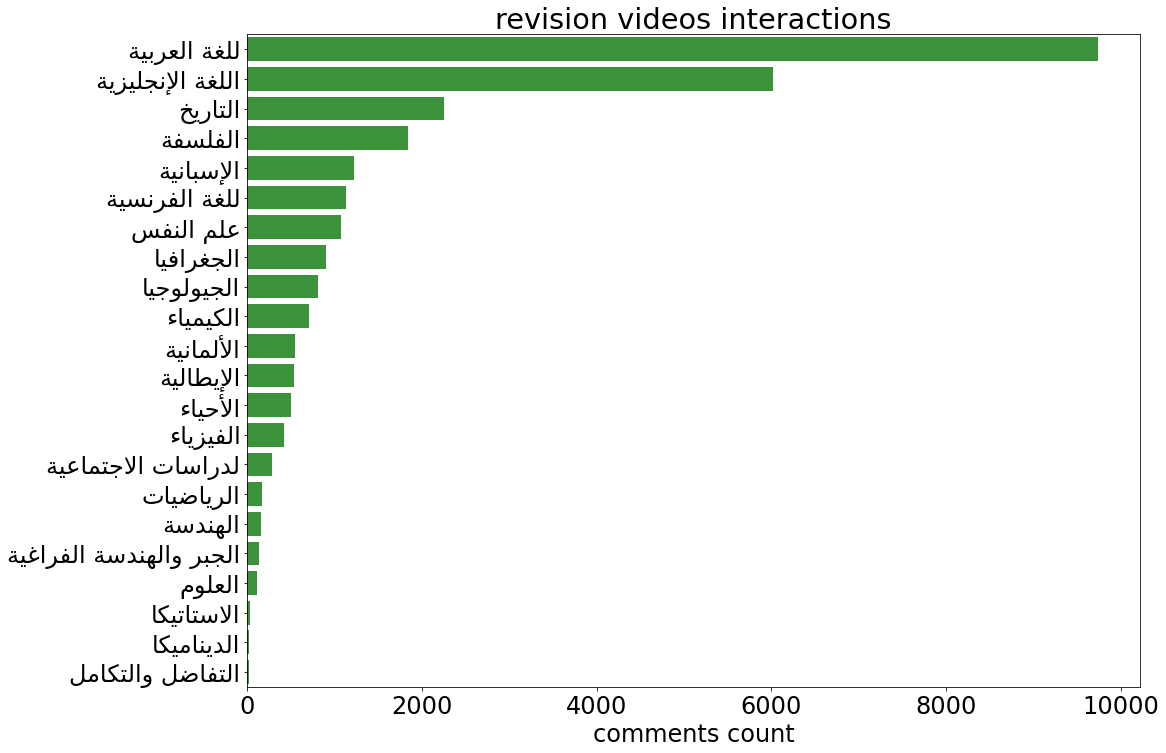

In [32]:
plot = plt.subplots(figsize = (16,12))
sns.barplot(y = data_lis.index, x = data_lis.values, color = colors[2])

plt.title('revision videos interactions')
_ = plt.xlabel("comments count")

## create wordcloud 
> select subjects values<br> create text with words counr<br> reshape arabic words<br>draw wordcloud

In [33]:
data_lis =live_df.genere.value_counts()

In [34]:
## collect data
word_list = []
for i in range(len(data_lis)):
     for j in range(data_lis.values[i]):
        word_list.append(data_lis.index[i].replace(" ", "­"))

In [35]:
## join text
text = " ".join(word_list)

In [36]:
## define reshape function

def reshape_arabic(text_file):
    te = arabic_reshaper.reshape(text_file)
    te = get_display(te)
    
      
    word_replace = {"ﺀ":"ء", "ﺍ":"ا", "ﺏ":"ب", "ﺕ":"ت", "ﺓ":"ة", "ﺙ":"ث", "ﺝ":"ج",
                    "ﺡ":"ح", "خ":"ﺥ", "ﺩ":"د", "ﺫ":"ذ", "ﺭ":"ر", "ﺯ":"ز", "ﺱ":"س", 
                    "ﺵ":"ش", "ﺹ":"ص", "ﺽ":"ض", "ﻁ":"ط", "ﻅ":"ظ", "ﻉ":"ع", "ﻍ":"غ",
                    "ﻑ":"ف", "ﻕ":"ق", "ﻙ":"ك", "ﻝ":"ل", "ﻡ":"م", "ﻥ":"ن", "ﻩ":"ه",
                    "ﻭ":"و", "ﻱ":"ى", "ﻯ":"ي" ,}                   
    for i in word_replace.keys():
        te = te.replace(i, word_replace[i])
        
    return te

In [37]:
## reshape text
text = reshape_arabic(text)

### generate wordcloud 

In [38]:
wordcloud = WordCloud(width = 600, height = 600,
                background_color ='white',
                stopwords = set(STOPWORDS),
                font_path='Tajawal-Regular.ttf',
                min_font_size = 11,
                collocations=False).generate(text)

### plot trext

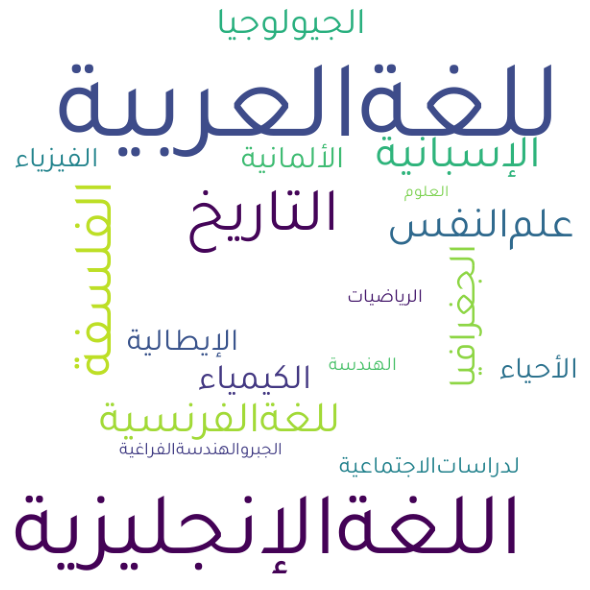

In [39]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show() 
